### Import Libraries:

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
# Load the data
df = pd.read_csv('C:/Users/anjun/Desktop/7150 Project/Dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic Statistics:

In [3]:
# describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for null values:

In [4]:
# Check for null values
df.isnull().values.any()

False

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Distribution of classes 0 & 1:

Text(0, 0.5, 'Frequency')

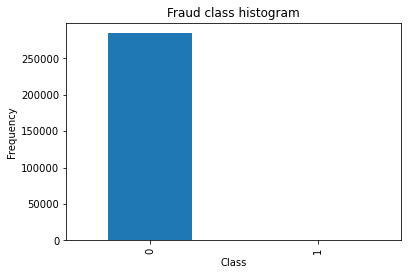

In [6]:
# Check the distribution of the classes
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
# print percentage of fraud and non-fraud transactions
print('Percentage of fraud transactions: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')
print('Percentage of non-fraud transactions: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')


Percentage of fraud transactions:  0.17 %
Percentage of non-fraud transactions:  99.83 %


### Distribution of Amount and Time:

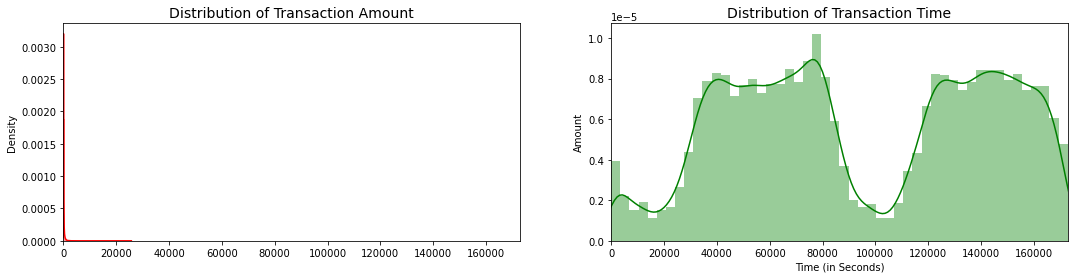

In [8]:
# subplot the distribution of the amount and time
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax1, color='r')
ax1.set_title('Distribution of Transaction Amount', fontsize=14)
ax1.set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax2, color='g')
ax2.set_title('Distribution of Transaction Time', fontsize=14)
ax2.set_xlim([min(time_val), max(time_val)])

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Scaling Amount and Time:

In [9]:
# Scale the amount and time
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount and scaled_time are Scaled values of Amount and Time respectively
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

### Dropping the previous Amount and Time feature and concatenating it with scaled Amount and scaled Time:

In [10]:
# drop the amount and time from the original data frame 


df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [11]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Fraud and Genuine Transactions in percentages:

In [12]:
# print fraud and non-fraud transactions in percentage
print('Percentage of fraud transactions: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')
print('Percentage of genuine transactions: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')


Percentage of fraud transactions:  0.17 %
Percentage of genuine transactions:  99.83 %


### Data Splitting : Test & Train

In [13]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# drop the class column from the data frame
X = df.drop('Class', axis=1)
y = df['Class']

# stratified sampling
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# turn the data frame into arrays
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# we turn the data frame into arrays
# because we want to use the data frame to plot the confusion matrix
# and the confusion matrix can only be plotted using arrays



TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [14]:
# Check the distribution of the classes in the training set and testing set is similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('Label Distributions: \n')

print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random UnderSampling Method:

In [15]:
# Random Under Sampling

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
genuine_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, genuine_df])

# Let's shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()



,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
233420,-0.106896,0.738554,2.037556,0.276439,-2.113543,0.934373,1.089666,-0.448318,0.658672,-0.248777,...,-0.217436,0.153800,0.472470,-0.040112,0.290940,0.496090,-0.510054,-0.039840,-0.069227,0
10690,16.724516,-0.782481,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,...,-2.147181,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1
97917,-0.142528,-0.214441,-0.510061,0.869314,2.080599,1.501452,-0.221462,0.054162,0.289684,0.094750,...,0.271217,-0.031704,0.409909,-0.209217,0.453953,0.071573,-0.186412,0.438928,0.208514,0
279863,5.142178,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
154676,-0.275554,0.209706,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,...,0.529557,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,1


### Plot for equally distributed classes:

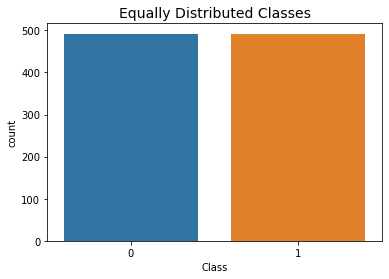

In [16]:
# plot the distribution of the classes
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


### Correlation Matrix:

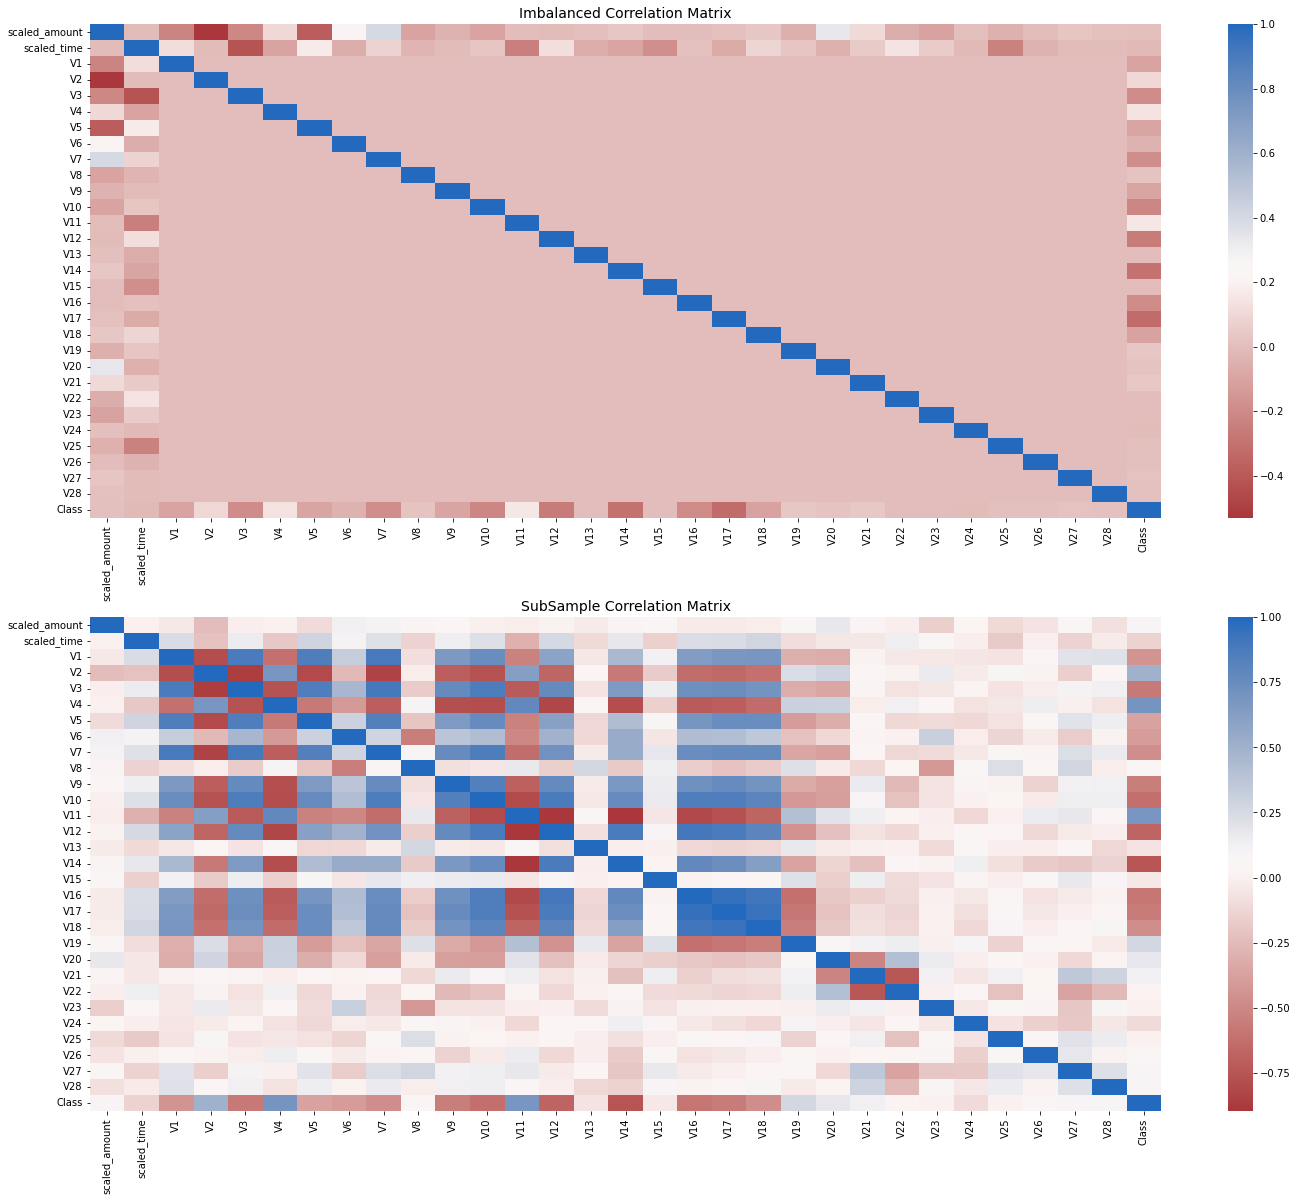

In [17]:
# Correlation matrix
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='vlag_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='vlag_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()


### Boxplots for negative correlations: V17, V14, V12 & V10

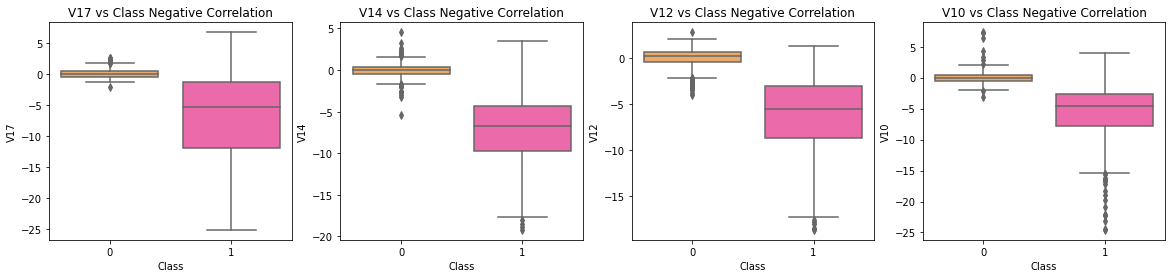

In [18]:
# Let's plot boxplots for negative correlations
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette="spring_r", ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette="spring_r", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette="spring_r", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette="spring_r", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()



### Boxplots for positive correlations: V11, V4, V2 & V19

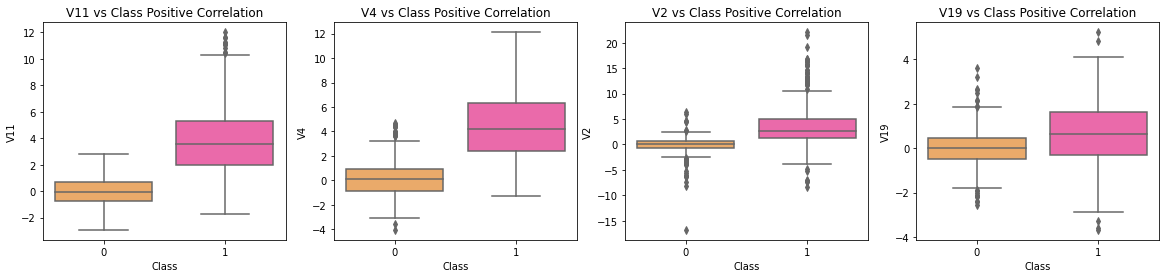

In [19]:
# Let's plot boxplots for positive correlations

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette="spring_r", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette="spring_r", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, palette="spring_r", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette="spring_r", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()


### Anomaly Detection: Outlier Removal

#### Distribution Plot for negative correlations:

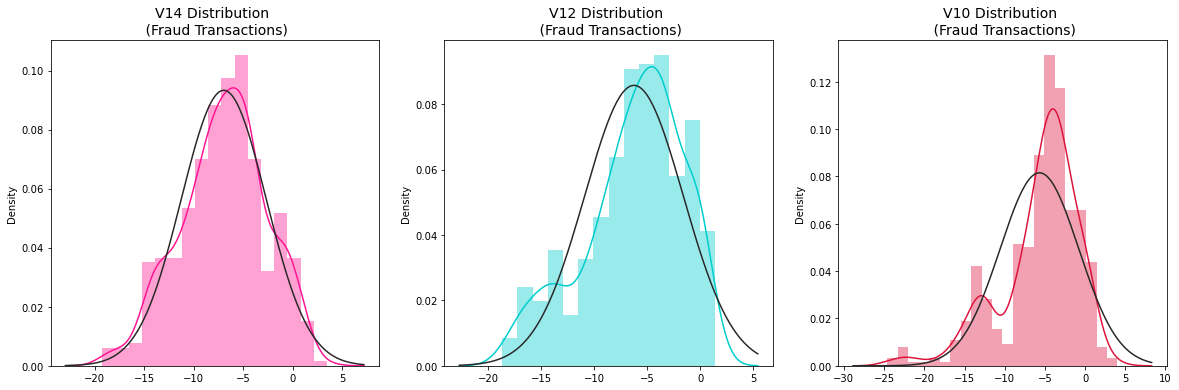

In [20]:
# We will use the interquartile range to remove the outliers in the Amount and Time feature

from scipy.stats import norm
# norm is a normal distribution
# we use norm to plot the distribution of the data
# by doing this, we can see the distribution of the data
# Distribution of transactions amount
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# plot distribution for negative correlations

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FF1493')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#00CDCD')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#DC143C')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()



#### Distribution Plot for positive correlations:

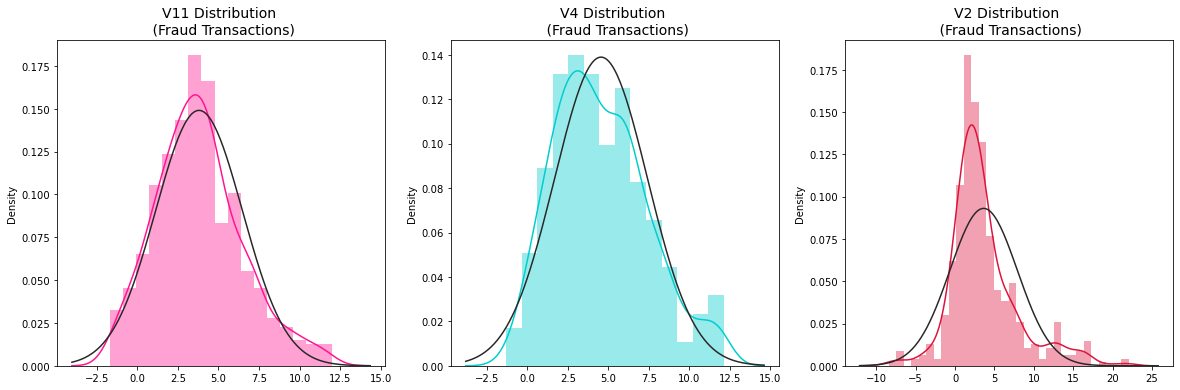

In [21]:
# plot distribution for positive correlations

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax1, fit=norm, color='#FF1493')
ax1.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='#00CDCD')
ax2.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(v2_fraud_dist,ax=ax3, fit=norm, color='#DC143C')
ax3.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()
# In comparison to features V2,V4 and V11 the distribution of V10, V12 and V14 are much more skewed.

#### Removing Outliers from V14, V12 & V10 :

In [22]:
# Remove outliers from V14

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75)) 
v14_iqr = q75 - q25 # Interquartile range
print('iqr: {}'.format(v14_iqr)) 

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper] # we are removing the outliers
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index) 
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('------------------------------------------------------------------------')

# Remove outliers from V12

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25 # Interquartile range
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper] # we are removing the outliers
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('------------------------------------------------------------------------')

# Remove outliers from V10

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25 # Interquartile range
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper] # we are removing the outliers
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('------------------------------------------------------------------------')

print('Number of Instances after outliers removal: {}'.format(len(new_df)))



Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
Number of Instances after outliers removal: 979
------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 outliers:[-18.6837146333443, -18.0475965708216, -18.4311310279993, -18.5536970096458]
Number of Instances after outliers removal: 975
------------------------------------------------------------------------
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
iqr: 4.954797397665595
Cut Off: 7.432196096498393
V10 Lower: -14.89885463232024
V

#### Boxplot after removing outliers:

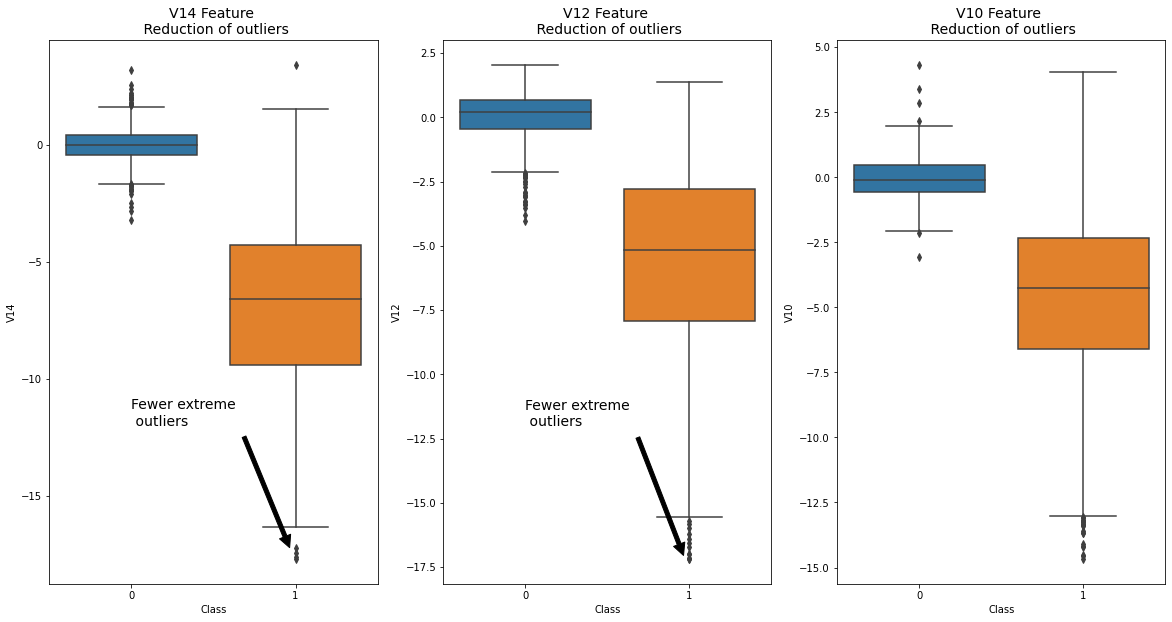

In [23]:
# Boxplot after removing outliers

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12)
                ,arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)  
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title('V12 Feature \n Reduction of outliers', fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title('V10 Feature \n Reduction of outliers', fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)   

plt.show()


### Dimensionality Reduction and Clustering:

#### # Using t-SNE, PCA and TruncatedSVD

In [24]:
# Dimensionality Reduction and Clustering

# new_df is the dataframe after removing outliers(random undersampling)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("t-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


t-SNE took 4.1 s
PCA took 0.0043 s
Truncated SVD took 0.0034 s


### Scatterplot of clusters using dimensionality reduction:

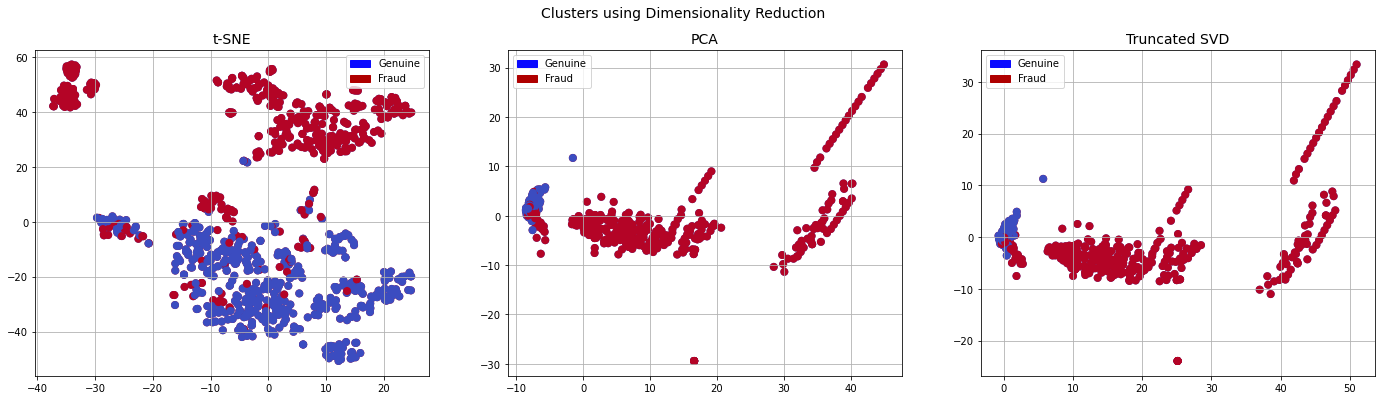

In [25]:
# Plot the result of the dimensionality reduction

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

#title for the plots
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Genuine')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
b1 = ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)   
b2 = ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
c1 = ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
c2 = ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
d1 = ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
d2 = ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Classifiers - Undersampling:

In [26]:
# Classifiers (UnderSampling)

# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [27]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Turn into an array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#### Implementing undersampling: LR, KNN, SVC & DTC

In [29]:
# Implementing Undersampling for Handling Imbalanced

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

#### Applying Cross Validation:

In [30]:
# Let's apply cross validation to see how our model performs on unseen data

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    

Classifiers:  LogisticRegression has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 93.0 % accuracy score
Classifiers:  SVC has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 90.0 % accuracy score


#### Applying GridSearchCV:

In [31]:
# Let's use GridSearchCV to find the best parameters.

from sklearn.model_selection import GridSearchCV

# Logistic Regression

log_reg_params = {"penalty": ['l1', 'l2'],  # l1 lasso l2 ridge
                    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000] } #np.logspace(0, 4, 10)} # Regularization parameter

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)  
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.

log_reg = grid_log_reg.best_estimator_

print("Logistic Regression: ", round(log_reg.score(X_train, y_train) * 100, 2).astype(str) + '%')

#  KNNeighbors Classifier 
knn_params = {"n_neighbors": list(range(2,5,1)),    # Number of neighbors to use by default for kneighbors queries.
                "algorithm": ['auto', 'ball_tree','kd_tree','brute']}  # Algorithm used to compute the nearest neighbors    

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train, y_train)


knn = grid_knn.best_estimator_

print("K Nearest Neighbors: ", round(knn.score(X_train, y_train) * 100, 2).astype(str) + '%')

# Support Vector Classifier
svc_params = {'C': [0.5,0.7, 0.9, 1],        # Regularization parameter
                  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.  
                "kernel": ['rbf', 'poly', 'sigmoid', 'linear']}                   # Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).   

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

print("Support Vector Classifier: ", round(svc.score(X_train, y_train) * 100, 2).astype(str) + '%') 

# Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"],  # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
                "max_depth": list(range(2,4,1)),    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.        
                "min_samples_leaf": list(range(5,7,1))}  # The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

dtc_clf = grid_tree.best_estimator_

print("Decision Tree Classifier: ", round(dtc_clf.score(X_train, y_train) * 100, 2).astype(str) + '%') 


Logistic Regression:  95.5%
K Nearest Neighbors:  94.44%
Support Vector Classifier:  95.37%
Decision Tree Classifier:  92.33%


#### # NearMiss Technique:

In [32]:
# Let's undersample during cross validating

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# loop over the different cross validation techniques
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Validation:",test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

# Show the results of the undersample data
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

# Empty list for storing our results
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Let's implement NearMiss Technique

from imblearn.under_sampling import NearMiss
nm = NearMiss()
# X_res,y_res = nm.fit_resample(undersample_X,undersample_y)
X_res, y_res = nm.fit_resample(undersample_X.values, undersample_y.values)

print('NearMiss Label Distribution: {}'.format(Counter(y_res)))

# This distribution is much better than the original one. Now we can train our model.
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))


Train: [ 56957  56958  56959 ... 284804 284805 284806] Validation: [    0     1     2 ... 57634 58991 59158]
Train: [     0      1      2 ... 284804 284805 284806] Validation: [ 56957  56958  56959 ... 122748 123098 124210]
Train: [     0      1      2 ... 284804 284805 284806] Validation: [113907 113908 113909 ... 175193 175539 175799]
Train: [     0      1      2 ... 284804 284805 284806] Validation: [170876 170877 170878 ... 227848 227849 227850]
Train: [     0      1      2 ... 227848 227849 227850] Validation: [226649 226878 227330 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


### Learning Curves:

In [33]:

# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#00C957")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#00C957",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#00C957")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#00C957",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#00C957")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#00C957",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#00C957")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#00C957",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\anjun\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

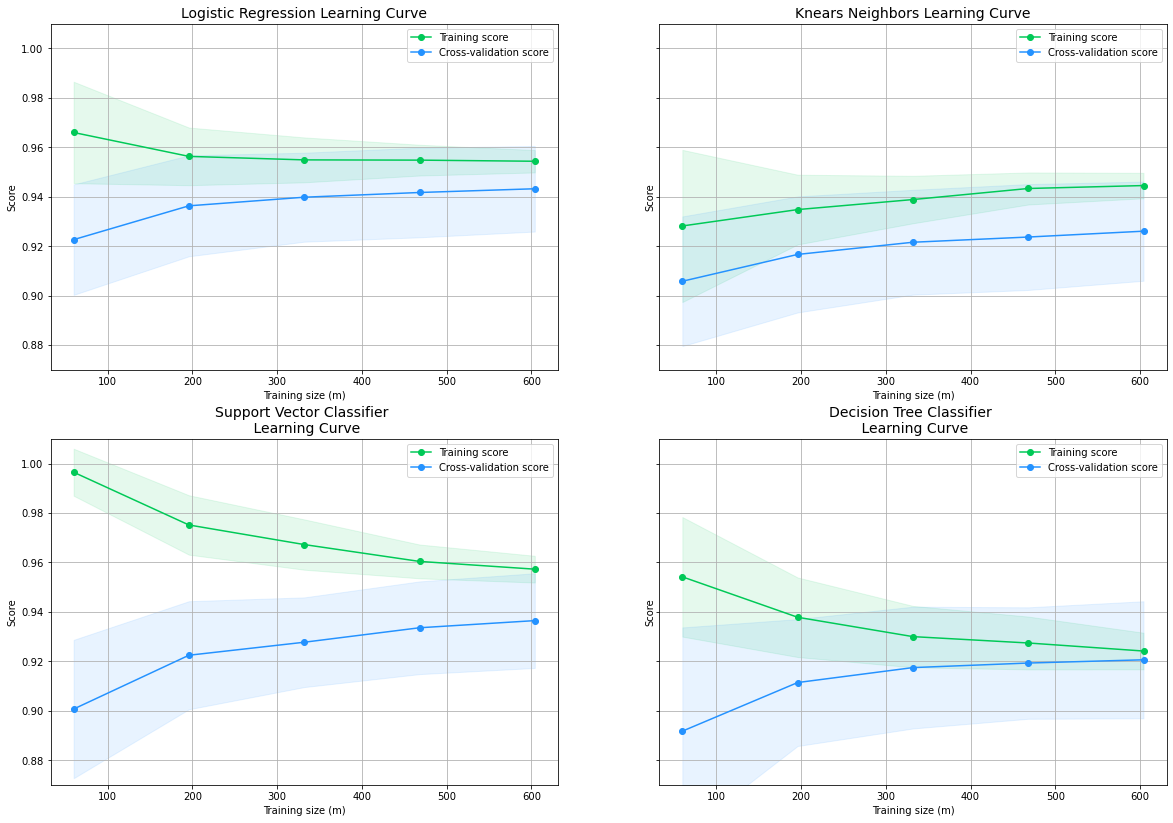

In [34]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(log_reg, knn, svc, dtc_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

### ROC Curve:

In [35]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knn, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

dtc_pred = cross_val_predict(dtc_clf, X_train, y_train, cv=5)



In [36]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNN: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, dtc_pred))



Logistic Regression:  0.9782291344993123
KNN:  0.9227702759608097
Support Vector Classifier:  0.9700247045282278
Decision Tree Classifier:  0.9156466690996884


#### Plotting ROC & P-R Curve:

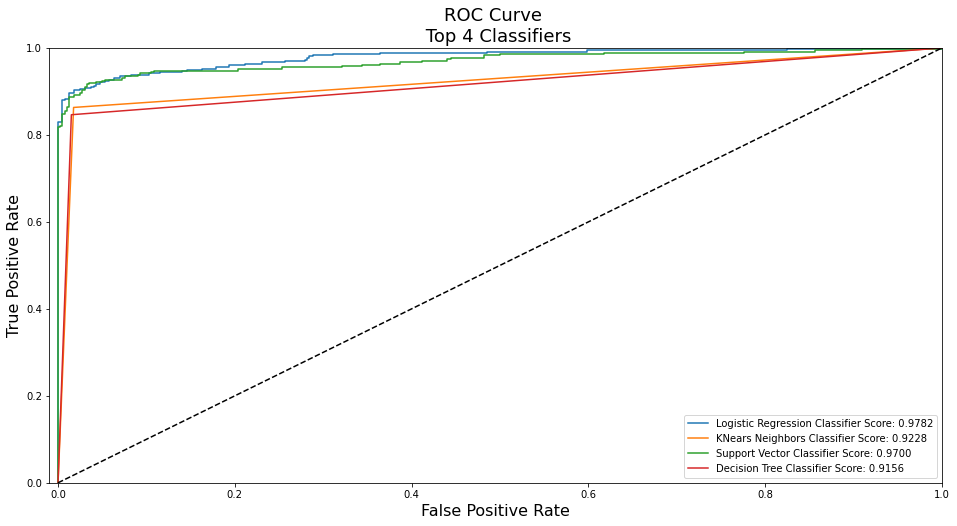

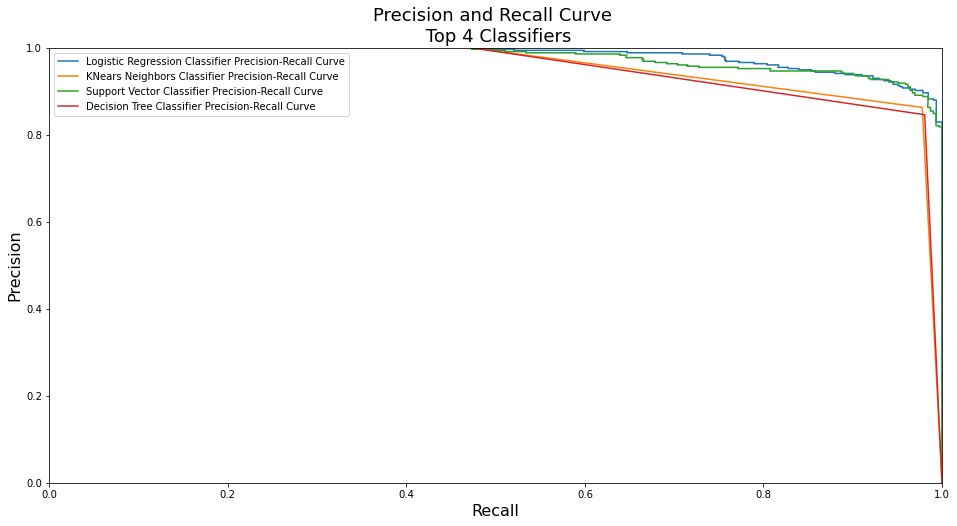

In [37]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, log_reg_pred)
fpr_knears, tpr_knears, thresholds_knears = roc_curve(y_train, knears_pred)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, svc_pred)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, dtc_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
        plt.figure(figsize=(16,8))
        plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
        plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
        plt.plot(knears_fpr, knears_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
        plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
        plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dtc_pred)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.axis([-0.01, 1, 0, 1])
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.legend()
        
graph_roc_curve_multiple(fpr, tpr, fpr_knears, tpr_knears, fpr_svc, tpr_svc, fpr_tree, tpr_tree)
plt.show()

# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
precision_knears, recall_knears, threshold_knears = precision_recall_curve(y_train, knears_pred)
precision_svc, recall_svc, threshold_svc = precision_recall_curve(y_train, svc_pred)
precision_tree, recall_tree, threshold_tree = precision_recall_curve(y_train, dtc_pred)

def graph_precision_recall_curve_multiple(precision, recall, precision_knears, recall_knears, precision_svc, recall_svc, precision_tree, recall_tree):
    plt.figure(figsize=(16,8))
    plt.title('Precision and Recall Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(precision, recall, label='Logistic Regression Classifier Precision-Recall Curve')
    plt.plot(precision_knears, recall_knears, label='KNears Neighbors Classifier Precision-Recall Curve')
    plt.plot(precision_svc, recall_svc, label='Support Vector Classifier Precision-Recall Curve')
    plt.plot(precision_tree, recall_tree, label='Decision Tree Classifier Precision-Recall Curve')
    plt.plot([0.2, 0.2], [0.8, 0.8], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.legend(loc='best')

graph_precision_recall_curve_multiple(precision, recall, precision_knears, recall_knears, precision_svc, recall_svc, precision_tree, recall_tree)   
plt.show()



### Picking our best model : Logistic Regression

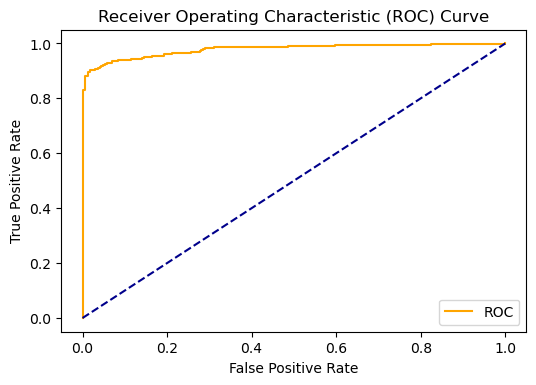

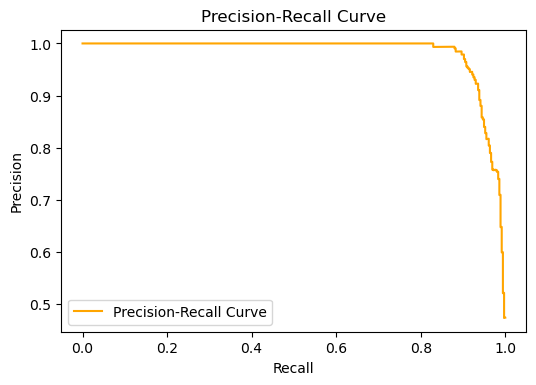

In [38]:
# Let's build a function to 
# build ROC curve for Logistic Regression
# and Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve

def graph_roc_curve(fpr, tpr):
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def graph_precision_recall_curve(precision, recall):
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(recall, precision, color='orange', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Logistic Regression ROC Curve
graph_roc_curve(fpr, tpr)
plt.show()

# Logistic Regression Precision Recall Curve
graph_precision_recall_curve(precision, recall)
plt.show()



In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [40]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.94
Precision Score: 0.72
F1 Score: 0.82
Accuracy Score: 0.80
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.70
Precision Score: 0.00
Recall Score: 0.29
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [41]:
undersample_y_score = log_reg.decision_function(original_Xtest)

#### # Average precision-recall score:

In [42]:
# average precision score
from sklearn.metrics import average_precision_score
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
        undersample_average_precision)) 

Average precision-recall score: 0.11


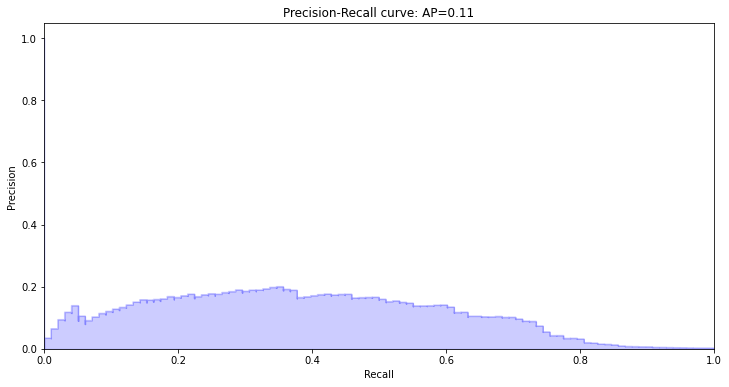

In [43]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

# build a undersampling precision recall curve

fig = plt.figure(figsize=(12,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])   
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: AP={0:0.2f}'.format(undersample_average_precision))

plt.show()



### OverSampling - using SMOTE:

In [44]:
# SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [45]:
# list to append the scores and then find the average
smote_accuracy = []
smote_precision = []
smote_recall = []
smote_f1 = []
smote_auc = []

# Classifier with optimal parameters
best_classifier = LogisticRegression()

#RandomizedSearchCV
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Create the parameter grid based on the results of random search
param_rand = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}   


for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_estimator = rand_log_reg.best_estimator_
    prediction = best_estimator.predict(original_Xtrain[test])
    
    smote_accuracy.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    smote_precision.append(precision_score(original_ytrain[test], prediction))
    smote_recall.append(recall_score(original_ytrain[test], prediction))
    smote_f1.append(f1_score(original_ytrain[test], prediction))
    smote_auc.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('SMOTE: \n')
print("Accuracy Score: {:.2f}".format(np.mean(smote_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(smote_precision)))
print("Recall Score: {:.2f}".format(np.mean(smote_recall)))
print("F1 Score: {:.2f}".format(np.mean(smote_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
SMOTE: 

Accuracy Score: 0.95
Precision Score: 0.06
Recall Score: 0.91
F1 Score: 0.11
---------------------------------------------------------------------------------------------------------------------------------------


#### # Generate a classification report for SMOTE:

In [46]:
labels = ['Genuine', 'Fraud']
smote_prediction = best_estimator.predict(original_Xtest)
print('Classification Report: \n')
print(classification_report(original_ytest, smote_prediction, target_names=labels))

Classification Report: 

              precision    recall  f1-score   support

     Genuine       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [47]:
smote_y_score = best_estimator.decision_function(original_Xtest)

#### Average P-R Score:

In [48]:
# average precision score
from sklearn.metrics import average_precision_score

smote_average_precision = average_precision_score(original_ytest, smote_y_score)
print('Average Precision-Recall Score: {0:0.2f}'.format(
        smote_average_precision))

Average Precision-Recall Score: 0.70


#### Plotting P-R curve:

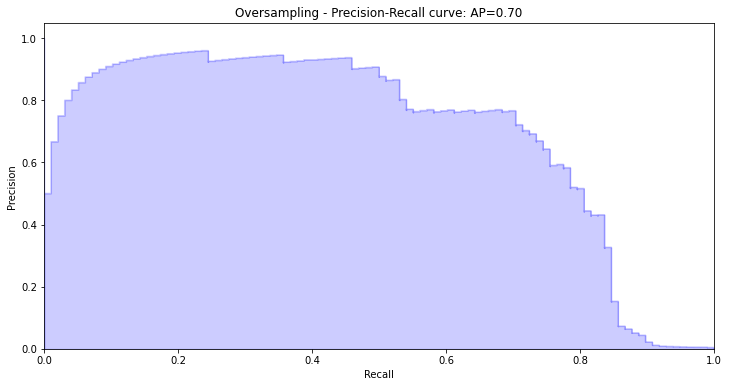

In [49]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(original_ytest, smote_y_score)

# build a SMOTE precision recall curve

fig = plt.figure(figsize=(12,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Oversampling - Precision-Recall curve: AP={0:0.2f}'.format(smote_average_precision))

plt.show()


### Smote Techniques after splitting and validation:

In [50]:
# smote technique after splitting and validation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [51]:
# split the data into train and test sets
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(original_Xtrain, original_ytrain)

### Implementing GridSearchCV:

In [52]:
# Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# LR
t0 = time.time()
log_reg_smote = grid_log_reg.best_estimator_
log_reg_smote.fit(X_train_sm, y_train_sm)

t1 = time.time()
print("Fitting the oversmapling data took :", t1-t0)

Fitting the oversmapling data took : 2.9124062061309814


In [53]:
# print the shape of X and y
print('Length of X-oversampling (train): {} | Length of y-oversampling (train): {}'.format(len(X_train_sm), len(y_train_sm)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))


Length of X-oversampling (train): 454904 | Length of y-oversampling (train): 454904
Length of X (test): 56961 | Length of y (test): 56961


### Using Test Data with Logistic Regression:

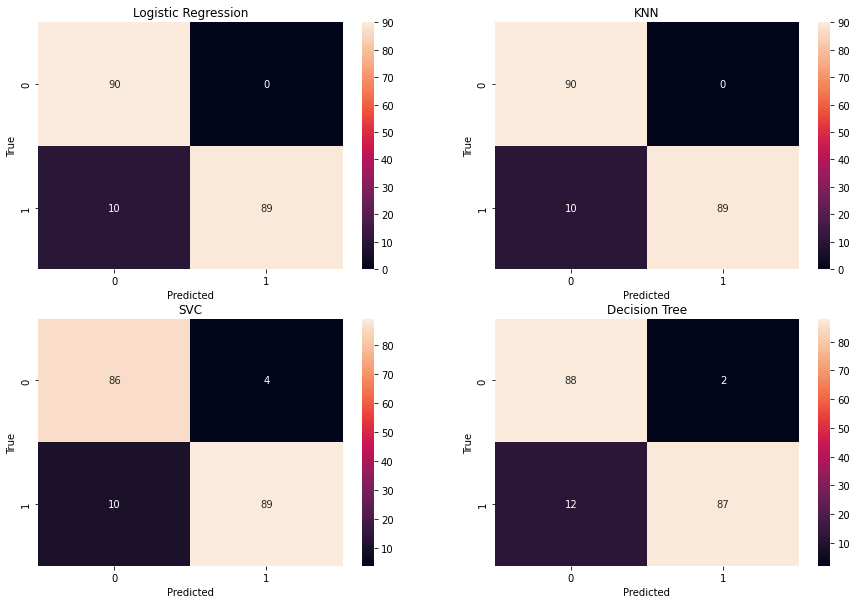

In [54]:
# LR model fitting with smote
y_pred_lr = log_reg_smote.predict(X_test) # we are using the test data here to predict the values of y

# other models fitting with undersampling
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dtc = dtc_clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(y_test, y_pred_lr)
knn_cf = confusion_matrix(y_test, y_pred_knn)
svc_cf = confusion_matrix(y_test, y_pred_svc)
dtc_cf = confusion_matrix(y_test, y_pred_dtc)

# plot confusion matrix of all models as subplots in heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(log_reg_cf, annot=True, ax=ax[0, 0], fmt='g')
ax[0, 0].set_title('Logistic Regression')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('True')

sns.heatmap(knn_cf, annot=True, ax=ax[0, 1], fmt='g')
ax[0, 1].set_title('KNN')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('True')

sns.heatmap(svc_cf, annot=True, ax=ax[1, 0], fmt='g')
ax[1, 0].set_title('SVC')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('True')

sns.heatmap(dtc_cf, annot=True, ax=ax[1, 1], fmt='g')
ax[1, 1].set_title('Decision Tree')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('True')

plt.show()



In [55]:

# True Negative: 85
# False Positive: 5
# False Negative: 8
# True Positive: 92

# 85 + 92 = 177 correct predictions
# 5 + 8 = 13 incorrect predi


In [56]:
# Classification Report

from sklearn.metrics import classification_report

print('---' * 45)
print('Classification Report of Logistic Regression: \n')
print(classification_report(y_test, y_pred_lr))
print('---' * 45)


print('Classification Report of KNN: \n')
print(classification_report(y_test, y_pred_knn))
print('---' * 45)


print('Classification Report of SVC: \n')
print(classification_report(y_test, y_pred_svc))
print('---' * 45)


print('Classification Report of Decision Tree: \n')
print(classification_report(y_test, y_pred_dtc))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Classification Report of Logistic Regression: 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.90      0.95        99

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

---------------------------------------------------------------------------------------------------------------------------------------
Classification Report of KNN: 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.90      0.95        99

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95      

### Final Score in the test set of logistic regression with undersampling and oversampling:

In [57]:
#Final Score in the test set of logistic regression with undersampling and oversampling

from sklearn.metrics import accuracy_score

# Final Score in the test set of logistic regression

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)

undersample_score = accuracy_score(y_test, y_pred)
undersample_recall = recall_score(y_test, y_pred)
undersample_f1 = f1_score(y_test, y_pred)
undersample_precision = precision_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_estimator.predict(original_Xtest)

oversample_score = accuracy_score(original_ytest, y_pred_sm)
oversample_recall = recall_score(original_ytest, y_pred_sm)
oversample_f1 = f1_score(original_ytest, y_pred_sm)
oversample_precision = precision_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score], 'Recall': [undersample_recall, oversample_recall], 'Precision':[undersample_precision, oversample_precision], 'F1-Score': [undersample_f1, oversample_f1]}
final_df = pd.DataFrame(data=d)

# Moving column 'score' to the front of the dataframe
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df



,Technique,Score,Recall,Precision,F1-Score
0,Random UnderSampling,0.947090,0.898990,1.00000,0.946809
1,Oversampling (SMOTE),0.985885,0.857143,0.09611,0.172840


### Neural Networks Testing (UnderSampling Data VS OverSampling (SMOTE)) : 

### Keras -  Undersampling

In [58]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

##### We are building a keras model to compare the accuracy of the model with the accuracy of the logistic regression model

In [59]:
# Build a model
new_inputs = X_train.shape[1]
new_inputs

undersample_model = Sequential([
    Dense(new_inputs, input_shape=(new_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [60]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile the model
undersample_model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
# Fit the model
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - loss: 1.0950 - accuracy: 0.4950 - val_loss: 0.8600 - val_accuracy: 0.5197 - 590ms/epoch - 24ms/step
Epoch 2/20
25/25 - 0s - loss: 0.9055 - accuracy: 0.5430 - val_loss: 0.7449 - val_accuracy: 0.5658 - 42ms/epoch - 2ms/step
Epoch 3/20
25/25 - 0s - loss: 0.7762 - accuracy: 0.5960 - val_loss: 0.6736 - val_accuracy: 0.5789 - 42ms/epoch - 2ms/step
Epoch 4/20
25/25 - 0s - loss: 0.6891 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6053 - 41ms/epoch - 2ms/step
Epoch 5/20
25/25 - 0s - loss: 0.6257 - accuracy: 0.6391 - val_loss: 0.5837 - val_accuracy: 0.6184 - 42ms/epoch - 2ms/step
Epoch 6/20
25/25 - 0s - loss: 0.5785 - accuracy: 0.6656 - val_loss: 0.5544 - val_accuracy: 0.6447 - 39ms/epoch - 2ms/step
Epoch 7/20
25/25 - 0s - loss: 0.5430 - accuracy: 0.6854 - val_loss: 0.5304 - val_accuracy: 0.6908 - 46ms/epoch - 2ms/step
Epoch 8/20
25/25 - 0s - loss: 0.5154 - accuracy: 0.7152 - val_loss: 0.5118 - val_accuracy: 0.6974 - 42ms/epoch - 2ms/step
Epoch 9/20
25/25 - 0s 

In [63]:
# Predict the model
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(undersample_model.predict(original_Xtest, batch_size=200, verbose=0), axis=-1)

In [64]:
# Plot the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### # Confusion Matrix - undersampling

Confusion matrix, without normalization
[[53601  3262]
 [   14    84]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


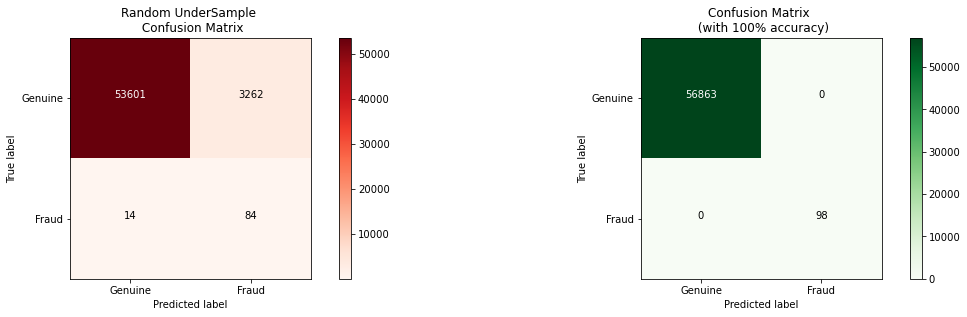

In [65]:
# Compute confusion matrix
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Genuine', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)


### Keras - oversampling

In [66]:
# Keras Model with SMOTE Technique - Oversampling

new_inputs_sm = X_train_sm.shape[1]

# Create the model
smote_model = Sequential([
    Dense(new_inputs, input_shape=(new_inputs_sm, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [67]:
# Compile the model
smote_model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
smote_model.fit(X_train_sm, y_train_sm, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

# Predict the model
smote_predictions = smote_model.predict(original_Xtest, batch_size=200, verbose=0)
smote_fraud_predictions = np.argmax(smote_model.predict(original_Xtest, batch_size=200, verbose=0), axis=-1)

Epoch 1/20
1214/1214 - 2s - loss: 0.2354 - accuracy: 0.9135 - val_loss: 0.1604 - val_accuracy: 0.9137 - 2s/epoch - 2ms/step
Epoch 2/20
1214/1214 - 1s - loss: 0.0856 - accuracy: 0.9701 - val_loss: 0.1182 - val_accuracy: 0.9503 - 1s/epoch - 1ms/step
Epoch 3/20
1214/1214 - 2s - loss: 0.0626 - accuracy: 0.9793 - val_loss: 0.0912 - val_accuracy: 0.9645 - 2s/epoch - 1ms/step
Epoch 4/20
1214/1214 - 1s - loss: 0.0495 - accuracy: 0.9837 - val_loss: 0.0698 - val_accuracy: 0.9724 - 1s/epoch - 1ms/step
Epoch 5/20
1214/1214 - 2s - loss: 0.0393 - accuracy: 0.9865 - val_loss: 0.0502 - val_accuracy: 0.9793 - 2s/epoch - 1ms/step
Epoch 6/20
1214/1214 - 2s - loss: 0.0311 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy: 0.9853 - 2s/epoch - 2ms/step
Epoch 7/20
1214/1214 - 2s - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0286 - val_accuracy: 0.9904 - 2s/epoch - 2ms/step
Epoch 8/20
1214/1214 - 2s - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0208 - val_accuracy: 0.9957 - 2s/epoch - 2ms/step
Epoch 9/

#### # Confusion Matrix - Oversampling

Confusion matrix, without normalization
[[56832    31]
 [   24    74]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


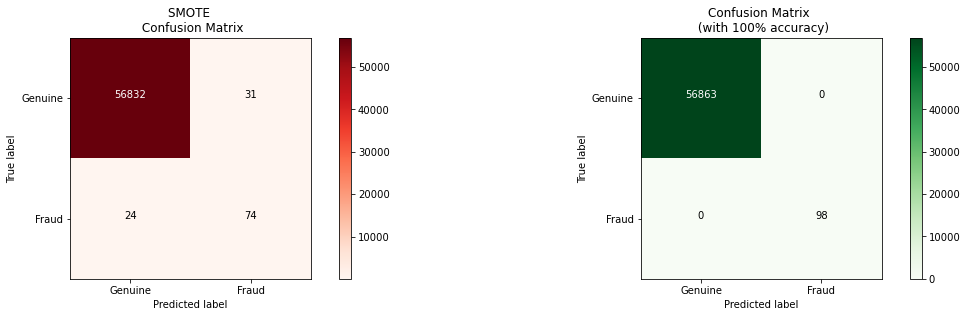

In [68]:
# Plot the confusion matrix
smote_cm = confusion_matrix(original_ytest, smote_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(smote_cm, labels, title="SMOTE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

#### Outlier removal on our oversample dataset and to check if our accuracy in the test set improves.

In [69]:

# contamination
fraud_indices = np.array(df[df.Class == 1].index
                        )
number_records_fraud = len(fraud_indices)   
print('Number of frauds transactions are ',number_records_fraud)

contamination = number_records_fraud / len(df)
print('Contamination is ', contamination)

Number of frauds transactions are  492
Contamination is  0.001727485630620034


### Isolation Forest with SMOTE:

In [70]:
from sklearn import model_selection
from sklearn.ensemble import IsolationForest

# Create the model
smote_model_if = IsolationForest(n_estimators=100, max_samples=len(X_train_sm),
                        contamination=contamination, random_state=1, verbose=0) 

# Fit the model
y_pred_if_sm = smote_model_if.fit_predict(X_train_sm)

In [71]:
# before removing outliers
print(X_train_sm.shape, y_train_sm.shape)


(454904, 30) (454904,)


In [72]:
# Removing outliers from above isolation forest
X_train_iforest_sm, y_train_iforest_sm = X_train_sm[(y_pred_if_sm != -1), :], y_train_sm[(y_pred_if_sm != -1)]

In [73]:
# after removing outliers
print(X_train_iforest_sm.shape, y_train_iforest_sm.shape)

(454118, 30) (454118,)


In [74]:
# let's refit smote to the above model of isolation forest

# Create the model

new_inputs_sm = X_train_iforest_sm.shape[1]
smote_model_if = Sequential([
    Dense(new_inputs, input_shape=(new_inputs_sm, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')      

])

# Compile the model
smote_model_if.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
smote_model_if.fit(X_train_iforest_sm, y_train_iforest_sm, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

# Predict the model
smote_predictions_if = smote_model_if.predict(original_Xtest, batch_size=200, verbose=0)
smote_fraud_predictions_if = np.argmax(smote_model_if.predict(original_Xtest, batch_size=200, verbose=0), axis=-1)

Epoch 1/20
1211/1211 - 2s - loss: 0.2061 - accuracy: 0.9373 - val_loss: 0.1563 - val_accuracy: 0.9169 - 2s/epoch - 2ms/step
Epoch 2/20
1211/1211 - 2s - loss: 0.0797 - accuracy: 0.9707 - val_loss: 0.1090 - val_accuracy: 0.9500 - 2s/epoch - 2ms/step
Epoch 3/20
1211/1211 - 1s - loss: 0.0565 - accuracy: 0.9789 - val_loss: 0.0775 - val_accuracy: 0.9651 - 1s/epoch - 1ms/step
Epoch 4/20
1211/1211 - 2s - loss: 0.0429 - accuracy: 0.9846 - val_loss: 0.0529 - val_accuracy: 0.9781 - 2s/epoch - 1ms/step
Epoch 5/20
1211/1211 - 2s - loss: 0.0327 - accuracy: 0.9881 - val_loss: 0.0385 - val_accuracy: 0.9853 - 2s/epoch - 1ms/step
Epoch 6/20
1211/1211 - 2s - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0263 - val_accuracy: 0.9936 - 2s/epoch - 2ms/step
Epoch 7/20
1211/1211 - 2s - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0201 - val_accuracy: 0.9968 - 2s/epoch - 2ms/step
Epoch 8/20
1211/1211 - 2s - loss: 0.0166 - accuracy: 0.9960 - val_loss: 0.0169 - val_accuracy: 0.9984 - 2s/epoch - 2ms/step
Epoch 9/

Confusion matrix, without normalization
[[56808    55]
 [   24    74]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


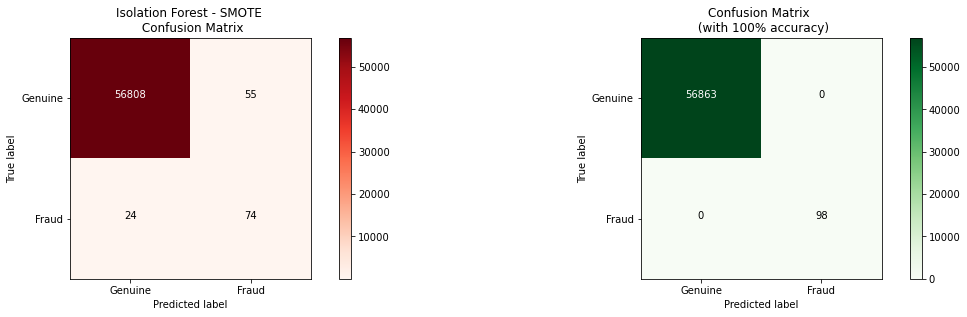

In [75]:
# 
smote_cm_if = confusion_matrix(original_ytest, smote_fraud_predictions_if)
actual_cm = confusion_matrix(original_ytest, original_ytest)

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(smote_cm_if, labels, title="Isolation Forest - SMOTE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [76]:
# accuracy of oversample

iForest_os_score = accuracy_score(original_ytest, smote_fraud_predictions_if)
print('Accuracy of Oversample is ', iForest_os_score)

Accuracy of Oversample is  0.9986130861466618


### Using Isolation Forest with Undersampling:

In [87]:
# let's use isolation forest on undersampling dataset

# Create the model
undersample_model_if = IsolationForest(n_estimators=100, max_samples=len(X_train),
                        contamination=contamination, random_state=1, verbose=0)                                                                     

# Fit the model
y_pred_if_us = undersample_model_if.fit_predict(X_train)

# Removing outliers from above isolation forest
X_train_iforest_us, y_train_iforest_us = X_train[(y_pred_if_us != -1), :], y_train[(y_pred_if_us != -1)]

print(X_train_iforest_us.shape, y_train_iforest_us.shape)

(754, 30) (754,)


In [107]:
# Refitting the model
new_inputs_us = X_train_iforest_us.shape[1]

undersample_model_if = Sequential([
    Dense(new_inputs, input_shape=(new_inputs_us, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
undersample_model_if.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
undersample_model_if.fit(X_train_iforest_us, y_train_iforest_us, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

# Predict the model
undersample_predictions_if = undersample_model_if.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions_if = np.argmax(undersample_model_if.predict(original_Xtest, batch_size=200, verbose=0), axis=-1)


Epoch 1/20
3/3 - 0s - loss: 1.9611 - accuracy: 0.5158 - val_loss: 1.7329 - val_accuracy: 0.5166 - 458ms/epoch - 153ms/step
Epoch 2/20
3/3 - 0s - loss: 1.8862 - accuracy: 0.5141 - val_loss: 1.6765 - val_accuracy: 0.5166 - 25ms/epoch - 8ms/step
Epoch 3/20
3/3 - 0s - loss: 1.8167 - accuracy: 0.5141 - val_loss: 1.6248 - val_accuracy: 0.5166 - 28ms/epoch - 9ms/step
Epoch 4/20
3/3 - 0s - loss: 1.7541 - accuracy: 0.5124 - val_loss: 1.5764 - val_accuracy: 0.5166 - 30ms/epoch - 10ms/step
Epoch 5/20
3/3 - 0s - loss: 1.6955 - accuracy: 0.5124 - val_loss: 1.5286 - val_accuracy: 0.5166 - 27ms/epoch - 9ms/step
Epoch 6/20
3/3 - 0s - loss: 1.6370 - accuracy: 0.5108 - val_loss: 1.4802 - val_accuracy: 0.5166 - 23ms/epoch - 8ms/step
Epoch 7/20
3/3 - 0s - loss: 1.5781 - accuracy: 0.5091 - val_loss: 1.4312 - val_accuracy: 0.5166 - 29ms/epoch - 10ms/step
Epoch 8/20
3/3 - 0s - loss: 1.5180 - accuracy: 0.5091 - val_loss: 1.3845 - val_accuracy: 0.5099 - 29ms/epoch - 10ms/step
Epoch 9/20
3/3 - 0s - loss: 1.4592

Confusion matrix, without normalization
[[51560  5303]
 [   88    10]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


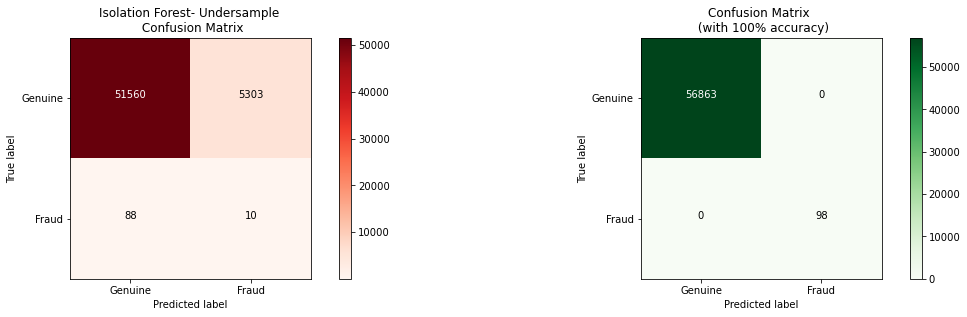

In [108]:
# confusion matrix

undersample_cm_if = confusion_matrix(original_ytest, undersample_fraud_predictions_if)
actual_cm = confusion_matrix(original_ytest, original_ytest)

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm_if, labels, title="Isolation Forest- Undersample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)



In [109]:
# accuracy of undersample
iForest_us_score = accuracy_score(original_ytest, undersample_fraud_predictions_if)
print('Accuracy of Undersample is ', iForest_us_score)

Accuracy of Undersample is  0.9053562964133355


### Final Metrics:

In [110]:
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling

undersample_score = accuracy_score(y_test, y_pred)
undersample_recall = recall_score(y_test, y_pred)
undersample_f1 = f1_score(y_test, y_pred)
undersample_precision = precision_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)

oversample_score = accuracy_score(original_ytest, smote_fraud_predictions)
oversample_recall = recall_score(original_ytest,smote_fraud_predictions)
oversample_f1 = f1_score(original_ytest, smote_fraud_predictions)
oversample_precision = precision_score(original_ytest,smote_fraud_predictions)

# Final Score in the test set of Isolation Forest

# Isolation Forest with Under-Sampling
iForest_us_score =  accuracy_score(original_ytest, undersample_fraud_predictions_if)
iForest_us_recall = recall_score(original_ytest, undersample_fraud_predictions_if) 
iForest_us_f1 = f1_score(original_ytest, undersample_fraud_predictions_if)
iForest_us_precision = precision_score(original_ytest, undersample_fraud_predictions_if)

# Isolation Forest with SMOTE Technique (Better accuracy with SMOTE t)
iForest_os_score = accuracy_score(original_ytest, smote_fraud_predictions_if)
iForest_os_recall = recall_score(original_ytest, smote_fraud_predictions_if)
iForest_os_f1 = f1_score(original_ytest, smote_fraud_predictions_if)
iForest_os_precision = precision_score(original_ytest, smote_fraud_predictions_if)



d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)', 'Isolation Forest - UnderSampling', 'Isolation Forest - Oversampling(SMOTE)'], 'Score': [undersample_score, oversample_score, iForest_us_score, iForest_os_score], 'Recall': [undersample_recall, oversample_recall, iForest_us_recall, iForest_os_recall ], 'Precision':[undersample_precision, oversample_precision, iForest_us_precision, iForest_os_precision], 'F1-Score': [undersample_f1, oversample_f1, iForest_us_f1, iForest_os_f1]}
final_df = pd.DataFrame(data=d)

final_df

,Technique,Score,Recall,Precision,F1-Score
0,Random UnderSampling,0.947090,0.898990,1.000000,0.946809
1,Oversampling (SMOTE),0.999034,0.755102,0.704762,0.729064
2,Isolation Forest - UnderSampling,0.905356,0.102041,0.001882,0.003696
3,Isolation Forest - Oversampling(SMOTE),0.998613,0.755102,0.573643,0.651982
